## **Curso de Especialização em Inteligência Artificial e Computacional** 
**ELT 574 - Aprendizado de Máquinas**

**Aluna:** Carine Madeira Soares  
**Instituição:** Universidade Federal de Viçosa

### Semana 4 - Lógica Fuzzy

In [145]:
# importando as bibliotecas
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)
import matplotlib.pyplot as plt
import matplotlib.pylab as pltpy
import simpful as sf

from simpful import *
from simpful import FuzzySet, FuzzyAggregator
from numpy import linspace, array
from mpl_toolkits.mplot3d import Axes3D

print('Setup completo!')

Setup completo!


#### Aula 01 - Conjuntos Fuzzy

##### Funções de Petinência


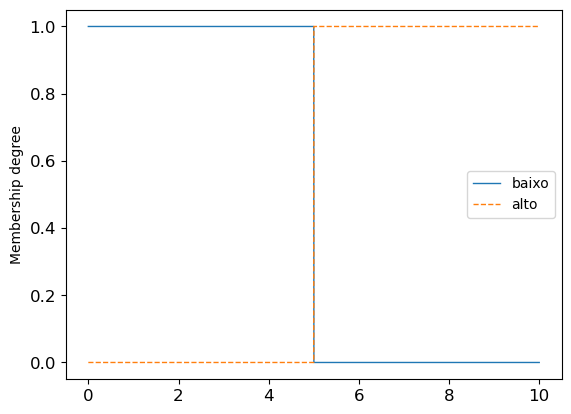

In [125]:
# Logistica booleana, ou está quente ou não está
C1 = sf.CrispSet(a=0, b=5, term='baixo')
C2 = sf.CrispSet(a=5, b=10, term='alto')
sf.LinguisticVariable([C1, C2], universe_of_discourse=[0, 10]).plot()

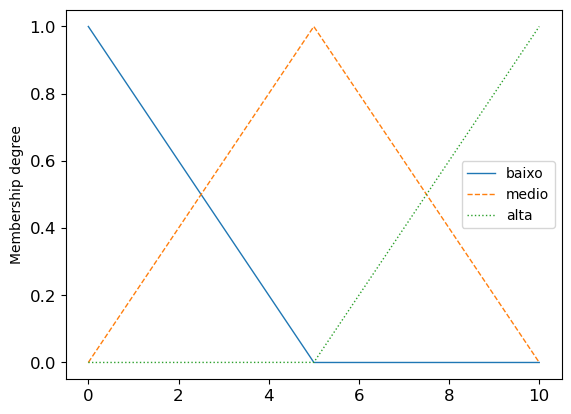

In [126]:
# Triangular
T1 = sf.TriangleFuzzySet(a=0, b=0, c=5, term='baixo')
T2 = sf.TriangleFuzzySet(a=0, b=5, c=10, term='medio')
T3 = sf.TriangleFuzzySet(a=5, b=10, c=10, term='alta')
sf.LinguisticVariable([T1, T2, T3], universe_of_discourse=[0, 10]).plot()

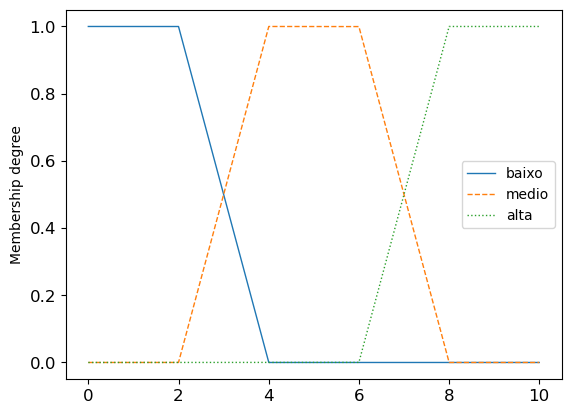

In [127]:
# Triangular
Tra1 = sf.TrapezoidFuzzySet(a=0, b=0, c=2, d=4, term='baixo')
Tra2 = sf.TrapezoidFuzzySet(a=2, b=4, c=6, d=8, term='medio')
Tra3 = sf.TrapezoidFuzzySet(a=6, b=8, c=10, d=10, term='alta')
sf.LinguisticVariable([Tra1, Tra2, Tra3], universe_of_discourse=[0, 10]).plot()

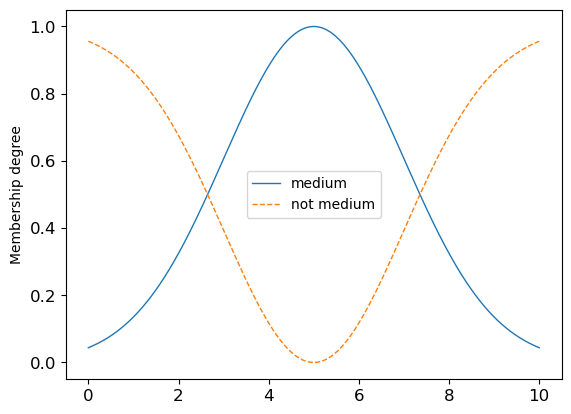

In [128]:
# Gaussiana
G1 = sf.GaussianFuzzySet(mu=5, sigma=2, term='medium')
G2 = sf.InvGaussianFuzzySet(mu=5, sigma=2, term='not medium')
sf.LinguisticVariable([G1, G2], universe_of_discourse=[0, 10]).plot()

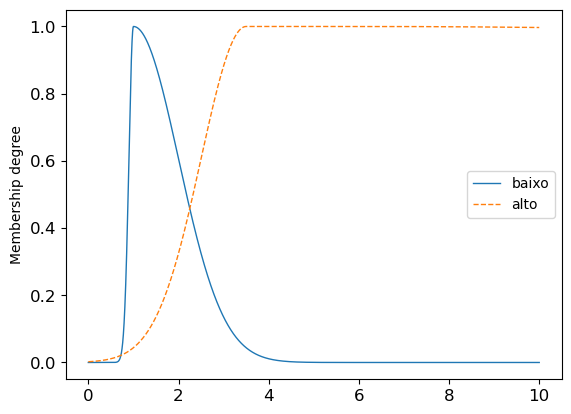

In [129]:
# Double Gaussiana
DG1 = sf.DoubleGaussianFuzzySet(mu1=1, sigma1=0.1, mu2=1, sigma2=1, term='baixo')
DG2 = sf.DoubleGaussianFuzzySet(mu1=3.5, sigma1=1, mu2=6, sigma2=51, term='alto')
sf.LinguisticVariable([DG1, DG2], universe_of_discourse=[0, 10]).plot()

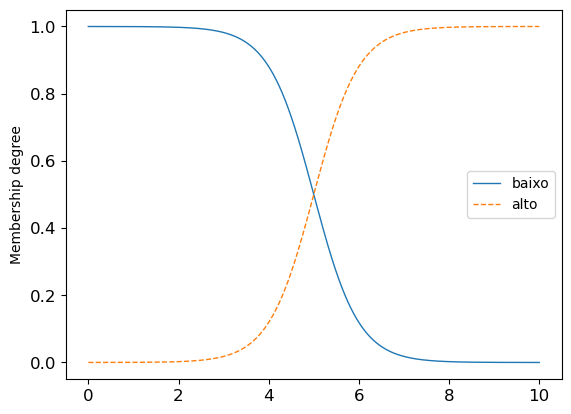

In [130]:
# Sigmoid
S1 = sf.InvSigmoidFuzzySet(c=5, a=2, term='baixo')
S2 = sf.SigmoidFuzzySet(c=5, a=2, term='alto')
sf.LinguisticVariable([S1, S2], universe_of_discourse=[0,10]).plot()

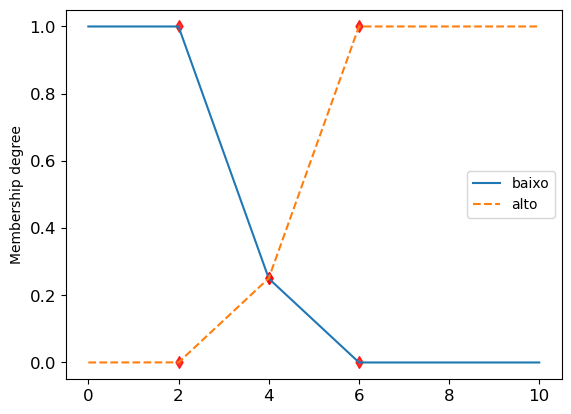

In [131]:
# Polinogo personalizado
P1 = sf.FuzzySet(points=[[2, 1], [4, 0.25], [6, 0]], term='baixo')
P2 = sf.FuzzySet(points=[[2, 0], [4, 0.25], [6, 1]], term='alto')
sf.LinguisticVariable([P1, P2], universe_of_discourse=[0,10]).plot()

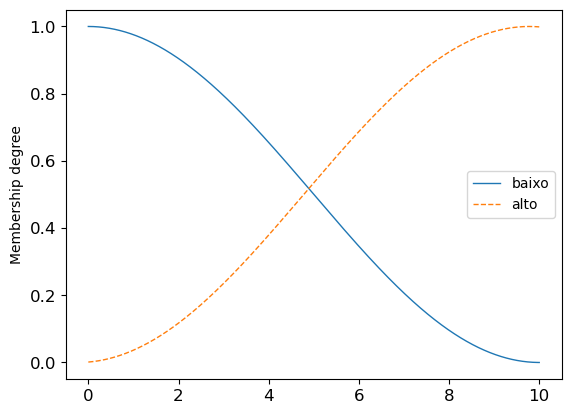

In [132]:
# Personalizada

def fun1(x):
    return 0.5*np.cos(0.314*x)+0.5
def fun2(x):
    return 0.5*np.sin(0.314*x-1.5)+0.5

F1 = sf.FuzzySet(function=fun1, term='baixo')
F2 = sf.FuzzySet(function=fun2, term='alto')
sf.LinguisticVariable([F1, F2], universe_of_discourse=[0,10]).plot()

##### Agregação de Áreas

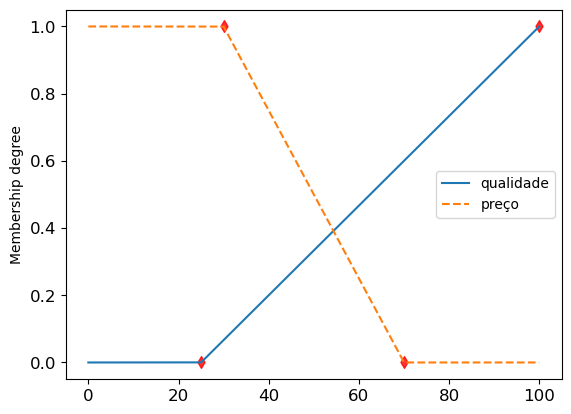

In [133]:
# Objeto agregador fuzzy
A = FuzzyAggregator(verbose=True)

FS1 = FuzzySet(points=[[25, 0], [100, 1]], term='qualidade')
FS2 = FuzzySet(points=[[30, 1], [70, 0]], term='preço')

sf.LinguisticVariable([FS1, FS2], universe_of_discourse=[0,100]).plot()

In [134]:
A.add_variables(FS1, FS2)

A.set_variable('qualidade', 55)
A.set_variable('preço', 42)

resultado = A.aggregate(['qualidade', 'preço'], aggregation_fun='product')
resultado

 * Variable qualidade set to 55.000000
 * Variable preço set to 42.000000
 * Aggregating the following values: [0.4, 0.7]
 * Using aggregation function: product


0.27999999999999997

***

#### Aula 02 - Métodos de inferência

##### Métodos de inferência: Mamdani

In [135]:
# interface do simple fuzzy
FS = FuzzySystem()

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.11.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



Trataremos o problema gorjeta que é qual o valor ideal considerando:
* qualidade do serviço
* qualidade da comida

A partir dessas duas variáveis, que não são binárias, definiremos o valor dado como gorjeta

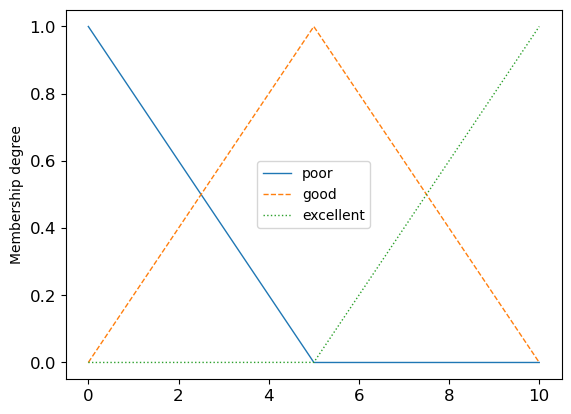

In [136]:
# QUALIDADE DO SERVIÇO
# ruim, medio, excelente
Serv_quality1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=5), term="poor") # saida = [0% 100% 0%]
Serv_quality2 = FuzzySet(function=Triangular_MF(a=0, b=5, c=10), term="good")
Serv_quality3 = FuzzySet(function=Triangular_MF(a=5, b=10, c=10), term="excellent")
FS.add_linguistic_variable("Service", LinguisticVariable([Serv_quality1, Serv_quality2, Serv_quality3], concept='Service quality', universe_of_discourse=[0,10]))

sf.LinguisticVariable([Serv_quality1, Serv_quality2, Serv_quality3], universe_of_discourse=[0, 10]).plot()

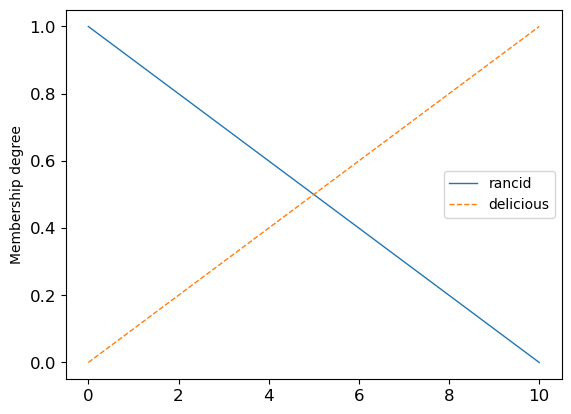

In [137]:
# QUALIDADE DA COMIDA
# terrível, deliciosa
Food_quality1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=10), term="rancid")
Food_quality2 = FuzzySet(function=Triangular_MF(a=0, b=10, c=10), term="delicious")
FS.add_linguistic_variable("Food", LinguisticVariable([Food_quality1, Food_quality2], concept='Food quality', universe_of_discourse=[0,10]))

sf.LinguisticVariable([Food_quality1, Food_quality2], universe_of_discourse=[0, 10]).plot()

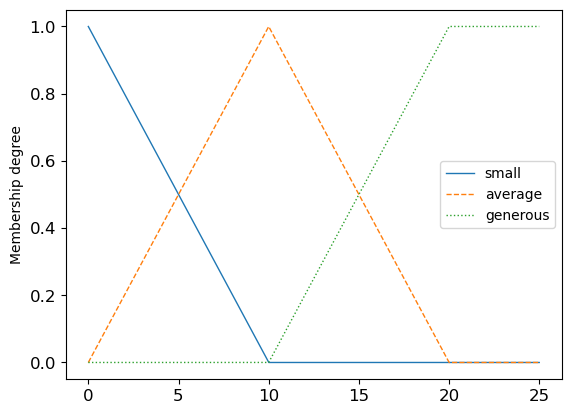

In [138]:
# VALOR DA GORJETA
Gorjeta1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=10), term='small')
Gorjeta2 = FuzzySet(function=Triangular_MF(a=0, b=10, c=20), term='average')
Gorjeta3 = FuzzySet(function=Trapezoidal_MF(a=10, b=20, c=25, d=25), term='generous')
FS.add_linguistic_variable("Tip", LinguisticVariable([Gorjeta1, Gorjeta2, Gorjeta3], universe_of_discourse=[0, 25]))

sf.LinguisticVariable([Gorjeta1, Gorjeta2, Gorjeta3], universe_of_discourse=[0, 25]).plot()

Com nossas funções definidas tem-se as seguintes regras:
* **SE** serviço RUIM **E** comida RUIM **ENTÃO** gorjeta é pequena
* **SE** serviço BOM **ENTÃO** gorjeta é média
* **SE** serviço EXCELENTE **OU** comida DELICIOSA **ENTÃO** gorjeta é generosa

In [139]:
Regra1 = "IF (Service IS poor) AND (Food IS rancid) THEN (Tip IS small)"
Regra2 = "IF (Service IS good) THEN (Tip IS average)"
Regra3 = "IF (Service IS excellent) OR (Food IS delicious) THEN (Tip IS generous)"
FS.add_rules([Regra1, Regra2, Regra3])

In [140]:
# Serviço = 4 e Comida = 8
FS.set_variable('Service', 4)
FS.set_variable('Food', 8)

FS.Mamdani_inference(['Tip'])

{'Tip': 14.17223614042091}

##### Métodos de inferência: Takagi-Sugeno-Kang

In [141]:
FS_TS = FuzzySystem()

# QUALIDADE DO SERVIÇO
# ruim, medio, excelente
SQ1 = FuzzySet(points=[[0, 1], [5, 0]], term="poor") # saida = [0% 100% 0%]
SQ2 = FuzzySet(points=[[0, 0], [5, 1], [10, 0]], term="good")
SQ3 = FuzzySet(points=[[5, 0], [10, 1]], term="excellent")
FS_TS.add_linguistic_variable("Service", LinguisticVariable([SQ1, SQ2, SQ3], concept='Service quality'))

# QUALIDADE DA COMIDA
# terrível, deliciosa
FQ1 = FuzzySet(points=[[0, 1], [10, 0]], term="rancid")
FQ2 = FuzzySet(points=[[0, 0], [10, 1]], term="delicious")
FS_TS.add_linguistic_variable("Food", LinguisticVariable([FQ1, FQ2], concept='Food quality'))

# SET CRISP
FS_TS.set_crisp_output_value("small", 5)
FS_TS.set_crisp_output_value("average", 15)

# VALOR DA GORJETA (Food_score+Service_score+5%)
FS_TS.set_output_function("generous", "1*Food+1*Service+5")

# REGRAS
R1 = "IF (Service IS poor) AND (Food IS rancid) THEN (Tip IS small)"
R2 = "IF (Service IS good) THEN (Tip IS average)"
R3 = "IF (Service IS excellent) OR (Food IS delicious) THEN (Tip IS generous)"
FS_TS.add_rules([R1, R2, R3])

# VALORES
FS_TS.set_variable("Service", 4)
FS_TS.set_variable("Food", 8)

FS_TS.Sugeno_inference(["Tip"])

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.11.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

 * Detected Sugeno model type


{'Tip': 14.777777777777779}

##### Métodos de inferência: Superfície Fuzzy - Combinação entre os Métodos

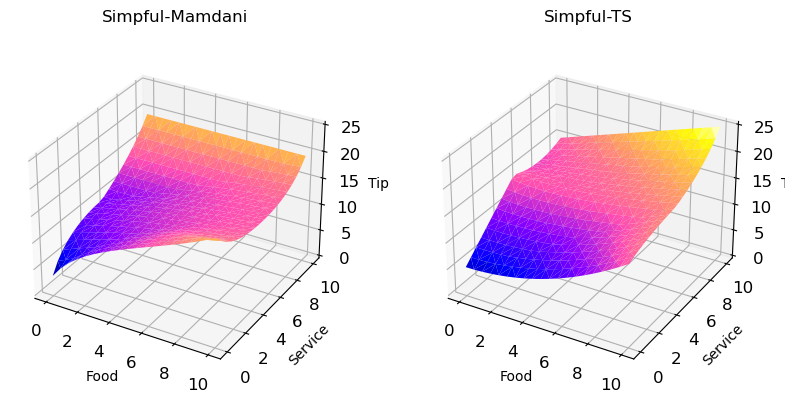

In [146]:
xs = []
ys = []
zs = []
div = 20

for x in linspace(0, 10, div):
    for y in linspace(0, 10, div):
        FS.set_variable('Food', x)
        FS.set_variable('Service', y)
        tip = FS.inference()['Tip']
        xs.append(x)
        ys.append(y)
        zs.append(tip)

xs = array(xs)
ys = array(ys)
zs = array(zs)

fig = pltpy.figure(figsize=(10,4))

m = fig.add_subplot(1,2,1, projection='3d')

xx, yy = pltpy.meshgrid(xs,ys)
m.plot_trisurf(xs, ys, zs, vmin=0, vmax=25, cmap='gnuplot2')
m.set_xlabel('Food')
m.set_ylabel('Service')
m.set_zlabel('Tip')
m.set_title('Simpful-Mamdani', pad=20)
m.set_zlim(0, 25)
pltpy.tight_layout()


xs = []
ys = []
zs_TS = []
div = 20

for x in linspace(0, 10, div):
    for y in linspace(0, 10, div):
        FS_TS.set_variable('Food', x)
        FS_TS.set_variable('Service', y)
        tip = FS_TS.inference()['Tip']
        xs.append(x)
        ys.append(y)
        zs_TS.append(tip)

xs = array(xs)
ys = array(ys)
zs_TS = array(zs_TS)


ts = fig.add_subplot(1,2,2, projection='3d')
ts.plot_trisurf(xs, ys, zs_TS, vmin=0, vmax=25, cmap='gnuplot2')
ts.set_xlabel('Food')
ts.set_ylabel('Service')
ts.set_zlabel('Tip')
ts.set_title('Simpful-TS', pad=20)
ts.set_zlim(0, 25)
pltpy.tight_layout()

pltpy.show()
